# Task 1 - Analyse der Auswirkung der Anzahl der Convolution Layers

## Assumptions

* Höhere Anzahl der Convolution Layer bedeutet auch mehr Genauigkeit beim Modell
* Höhere Anzahl der Convolution Layer bedeutet mehr benötigte Rechenleistung
* Höhere Anzahl der Convolution Layer könnte zu Overfitting führen

## Vorgehensweise

Ich habe, um die reine Anzahl der Convolution-Layers zu betrachten, alle anderen Variablen (Anzahl der Filter, Kernel-Größe, Pool-Größe) gleich gelassen. Wahrscheinlich würde man beim echten Training auch diese Werte entsprechend anpassen.

## Imports

In [10]:
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np
import os
import random

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomContrast, RandomBrightness

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

from keras.models import load_model

## Training der Modelle

Beim Training ergaben sich jeweils folgende Werte für den höchsten Epoch-Wert:

* 1: 
accuracy: 0.7165 - loss: 0.6751 - val_accuracy: 0.6953 - val_loss: 0.7403 - learning_rate: 1.0000e-04
* 2: 
accuracy: 0.8304 - loss: 0.4482 - val_accuracy: 0.7969 - val_loss: 0.6205 - learning_rate: 1.0000e-04
* 3:
accuracy: 0.9624 - loss: 0.1149 - val_accuracy: 0.8438 - val_loss: 0.4906 - learning_rate: 1.0000e-04
* 4:
accuracy: 0.9112 - loss: 0.2316 - val_accuracy: 0.8516 - val_loss: 0.4510 - learning_rate: 2.0000e-04
* 5:
accuracy: 0.9122 - loss: 0.2698 - val_accuracy: 0.8984 - val_loss: 0.4261 - learning_rate: 2.0000e-04

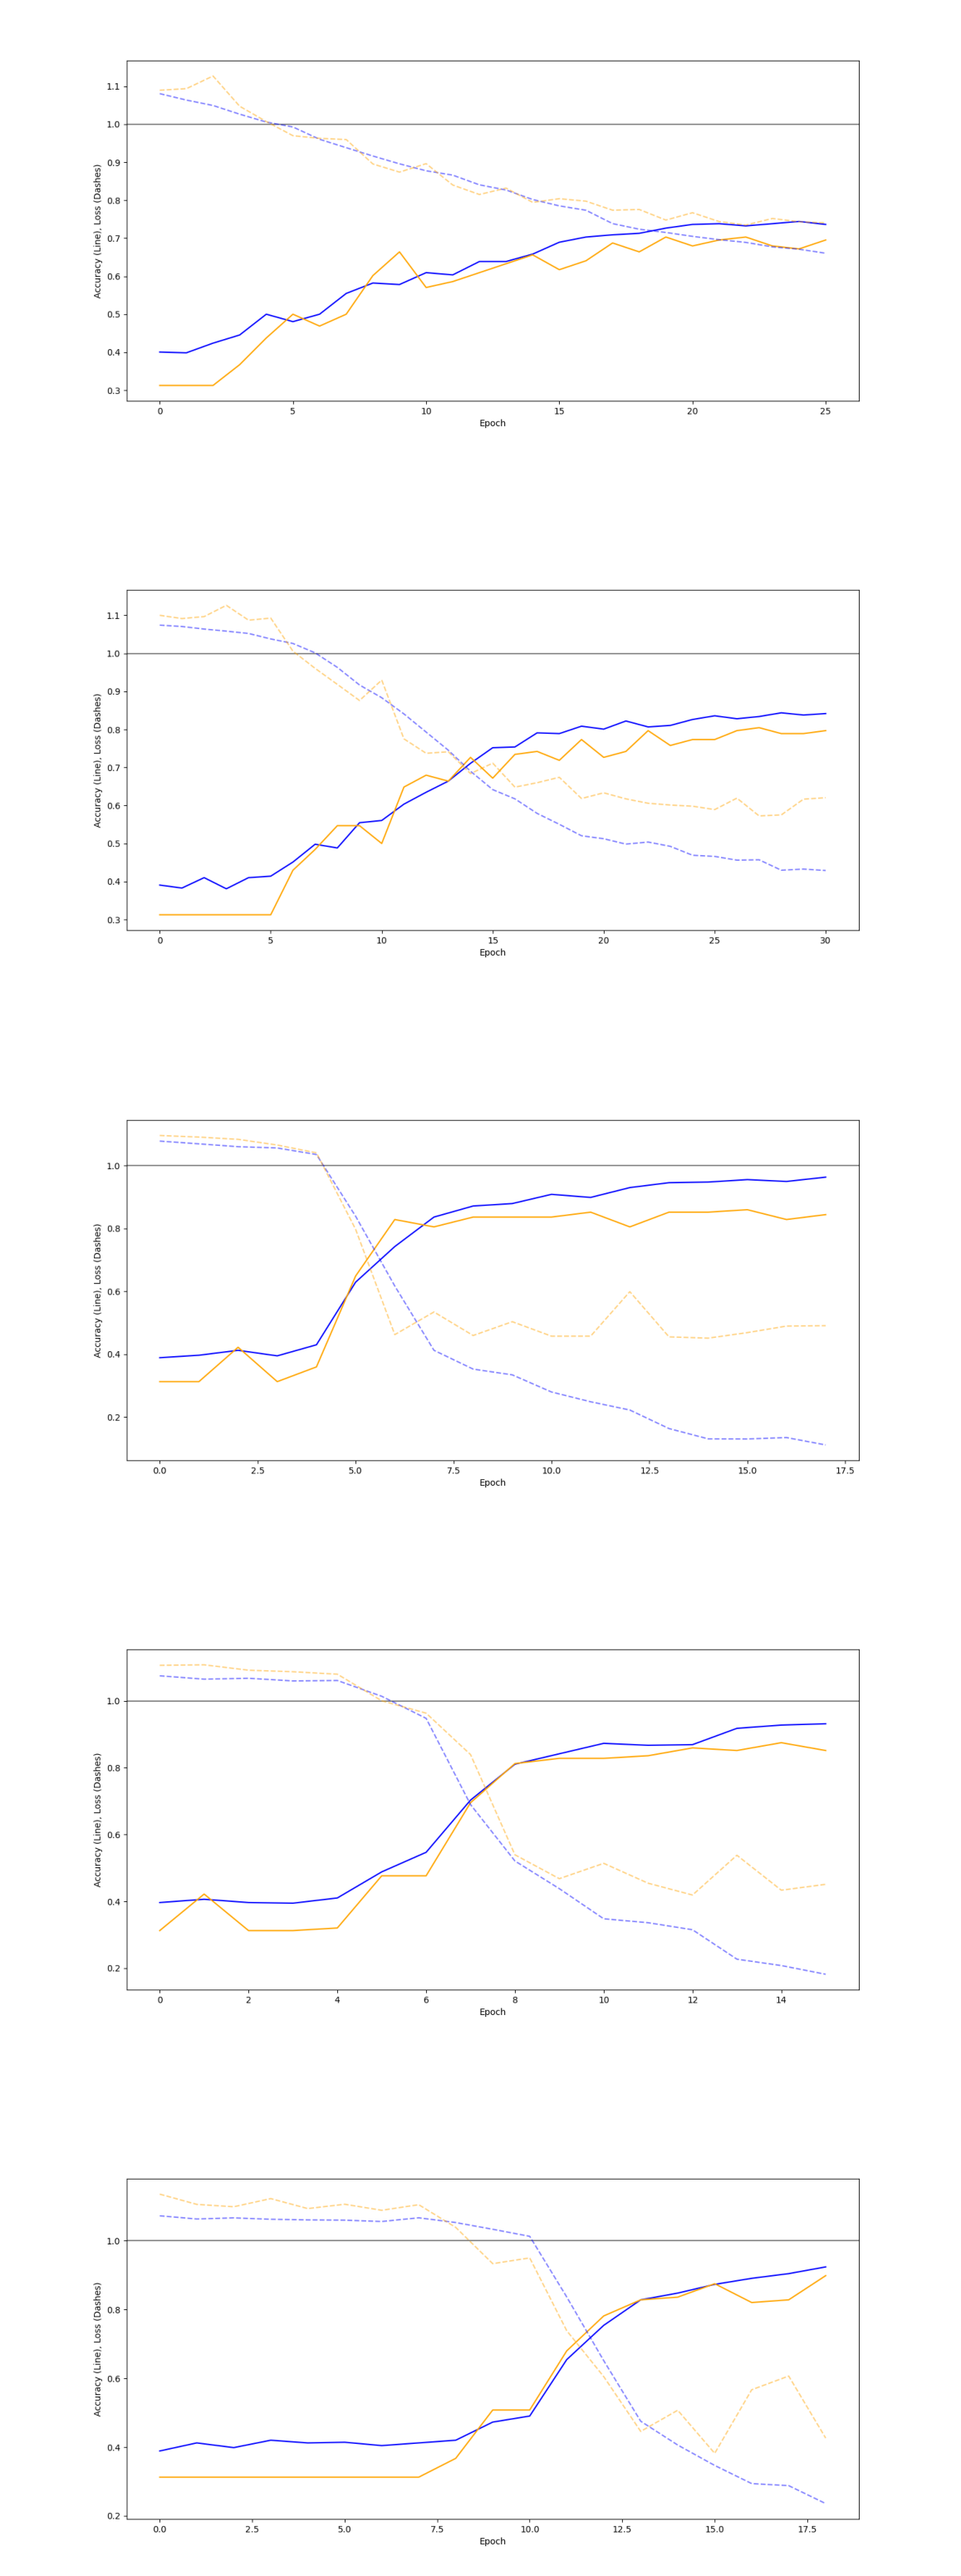

In [18]:
folder_path = 'plots'
loaded_images = []

# Loop through the images in the folder
for i in range(1, 6):
    image_path = os.path.join(folder_path, f'accuracy_loss_{i}.png')
    
    # Load image and append to the list
    loaded_image = plt.imread(image_path)
    loaded_images.append(loaded_image)

# Display the loaded images
plt.figure(figsize=(40, 40))
for i, image in enumerate(loaded_images, start=1):
    plt.subplot(5, 1, i)
    plt.imshow(image)
    plt.axis('off')
plt.show()

Man erkennt, dass für eine höhere Anzahl an Convolution Layers auch eine höhere Anzahl an Epochs für eine hohe Accuracy nötig ist. Die Loss-Funktion sinkt steiler bei mehr Convolution Layers.

## Laden der Modelle

In [20]:
models = [
    load_model("convolution_layers_1.keras"),
    load_model("convolution_layers_2.keras"),
    load_model("convolution_layers_3.keras"),
    load_model("convolution_layers_4.keras"),
    load_model("convolution_layers_5.keras")
]

for model in models:
    model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_4 (RandomFlip)      │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_4               │ (8, 64, 64, 3)         │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (8, 64, 64, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (8, 32, 32, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (8, 32, 32, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (8, 32768)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (8, 64)                │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (8, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (8, 3)                 │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,307,403 (24.06 MB)

 Trainable params: 2,102,467 (8.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,204,936 (16.04 MB)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_6 (RandomFlip)      │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_6               │ (8, 64, 64, 3)         │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (8, 64, 64, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (8, 32, 32, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (8, 32, 32, 32)        │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (8, 16, 16, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (8, 16, 16, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (8, 8192)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (8, 64)                │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (8, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (8, 3)                 │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,616,555 (6.17 MB)

 Trainable params: 538,851 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,077,704 (4.11 MB)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_7 (RandomFlip)      │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_7               │ (8, 64, 64, 3)         │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (8, 64, 64, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (8, 32, 32, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (8, 32, 32, 32)        │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (8, 16, 16, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (8, 16, 16, 32)        │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (8, 8, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (8, 8, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (8, 2048)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (8, 64)                │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (8, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (8, 3)                 │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 464,651 (1.77 MB)

 Trainable params: 154,883 (605.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 309,768 (1.18 MB)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_8 (RandomFlip)      │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_8               │ (8, 64, 64, 3)         │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (8, 64, 64, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (8, 32, 32, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (8, 32, 32, 32)        │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (8, 16, 16, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (8, 16, 16, 32)        │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (8, 8, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (8, 8, 8, 32)          │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (8, 4, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (8, 4, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (8, 512)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (8, 64)                │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (8, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (8, 3)                 │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,483 (771.42 KB)

 Trainable params: 65,827 (257.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 131,656 (514.29 KB)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_9 (RandomFlip)      │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_9               │ (8, 64, 64, 3)         │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (8, 64, 64, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (8, 32, 32, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (8, 32, 32, 32)        │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (8, 16, 16, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (8, 16, 16, 32)        │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (8, 8, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (8, 8, 8, 32)          │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (8, 4, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (8, 4, 4, 32)          │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (8, 2, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (8, 2, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (8, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (8, 64)                │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (8, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (8, 3)                 │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,499 (591.80 KB)

 Trainable params: 50,499 (197.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,000 (394.54 KB)

# Inferenzzeiten

Es wurden folgende Inferenzzeiten gemessen (diese Variieren natürlich je nach Ausführung):

* 1: 0.0864 seconds
* 2: 0.1480 seconds
* 3: 0.1577 seconds
* 4: 0.1627 seconds
* 5: 0.1614 seconds

Wie bereits vermutet, nehmen die Inferenzzeiten mit zunehmender Anzahl der Convolution-Layers tendenziell auch zu, da mehr Rechenleistung erforderlich ist.

## Konfusionsmatrizen

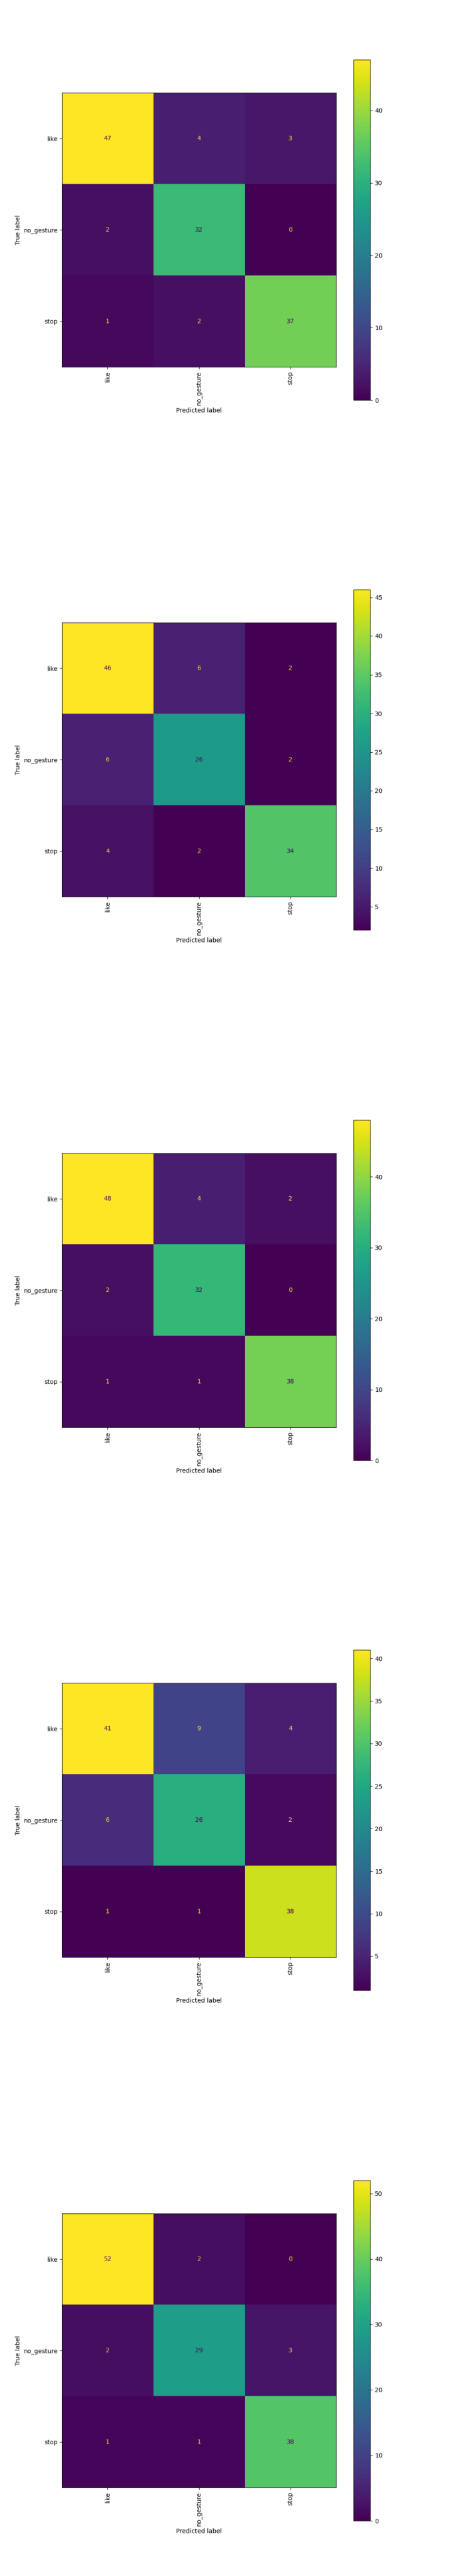

In [23]:
folder_path = 'confusion_matrices'
loaded_images = []

# Loop through the images in the folder
for i in range(1, 6):
    image_path = os.path.join(folder_path, f'confusion_matrix_{i}.png')
    
    # Load image and append to the list
    loaded_image = plt.imread(image_path)
    loaded_images.append(loaded_image)

# Display the loaded images
plt.figure(figsize=(20, 50))
for i, image in enumerate(loaded_images, start=1):
    plt.subplot(5, 1, i)
    plt.imshow(image)
    plt.axis('off')
plt.show()

Bei den Konfusionsmatrizen sind eigentlich kaum Tendenzen oder schwerwiegende Unterschiede zu erkennen.